# Analysis of diabetes data
Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.head(10).style.background_gradient(cmap='rainbow')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
5,5,116,74,0,0,25.600000,0.201000,30,0
6,3,78,50,32,88,31.000000,0.248000,26,1
7,10,115,0,0,0,35.300000,0.134000,29,0
8,2,197,70,45,543,30.500000,0.158000,53,1
9,8,125,96,0,0,0.000000,0.232000,54,1


In [5]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
422,0,102,64,46,78,40.6,0.496,21,0
109,0,95,85,25,36,37.4,0.247,24,1
503,7,94,64,25,79,33.3,0.738,41,0
5,5,116,74,0,0,25.6,0.201,30,0
379,0,93,100,39,72,43.4,1.021,35,0


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.shape

(768, 9)

In [8]:
data.describe().columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.duplicated().any() 

False

In [12]:
data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data['Outcome'].value_counts() # Outcome (0: No Diabetes, 1: Diabetes)


0    500
1    268
Name: Outcome, dtype: int64

Text(0.5, 0, 'Outcome (0: No Diabetes, 1: Diabetes)')

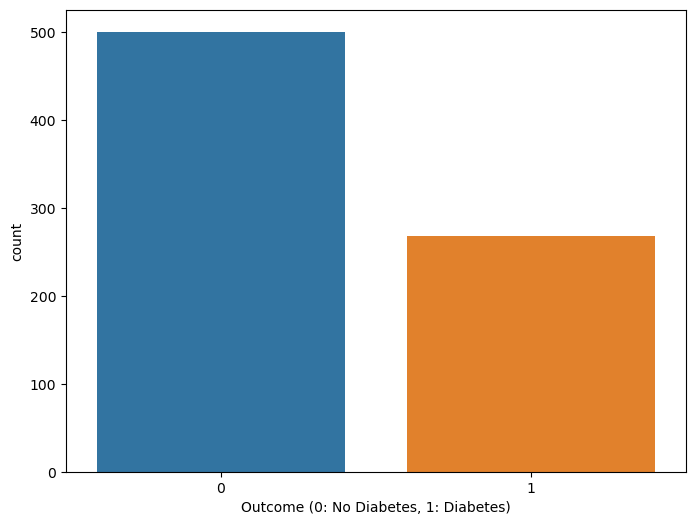

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data = data ,x= data['Outcome'])
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')


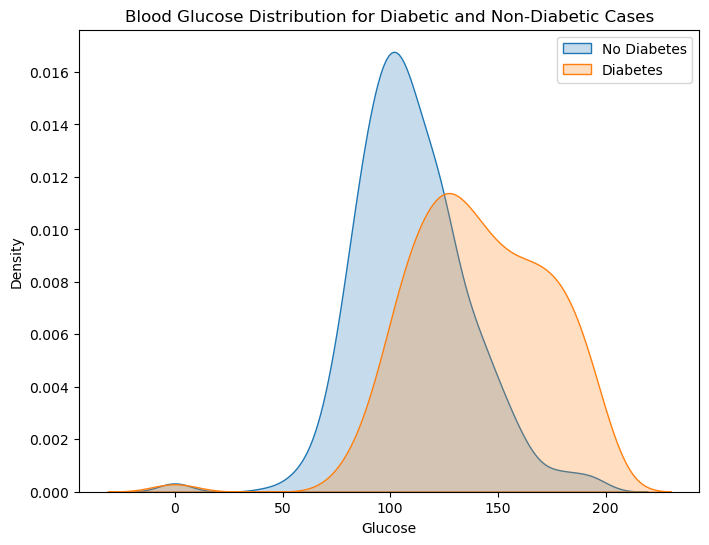

In [15]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Outcome'] == 0]['Glucose'], label='No Diabetes', shade=True)
sns.kdeplot(data[data['Outcome'] == 1]['Glucose'], label='Diabetes', shade=True)
plt.title('Blood Glucose Distribution for Diabetic and Non-Diabetic Cases')
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.legend()
plt.show()

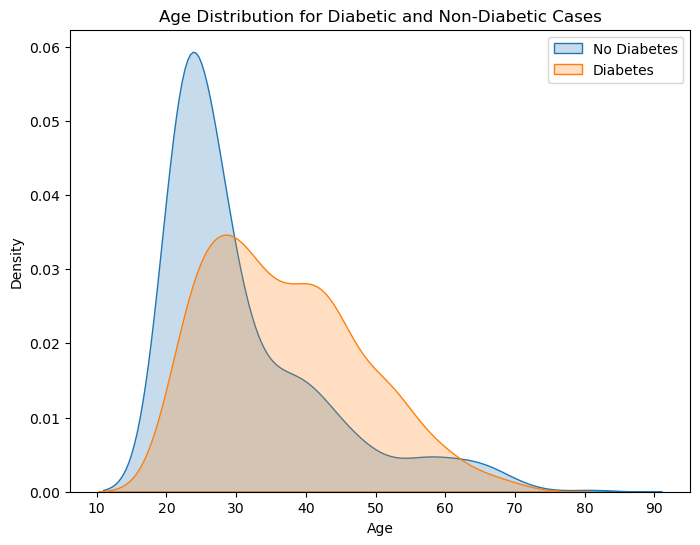

In [16]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Outcome'] == 0]['Age'], label='No Diabetes', shade=True)
sns.kdeplot(data[data['Outcome'] == 1]['Age'], label='Diabetes', shade=True)
plt.title('Age Distribution for Diabetic and Non-Diabetic Cases')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [17]:
data.corr()    # Correlation coefficients for each column with all the columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

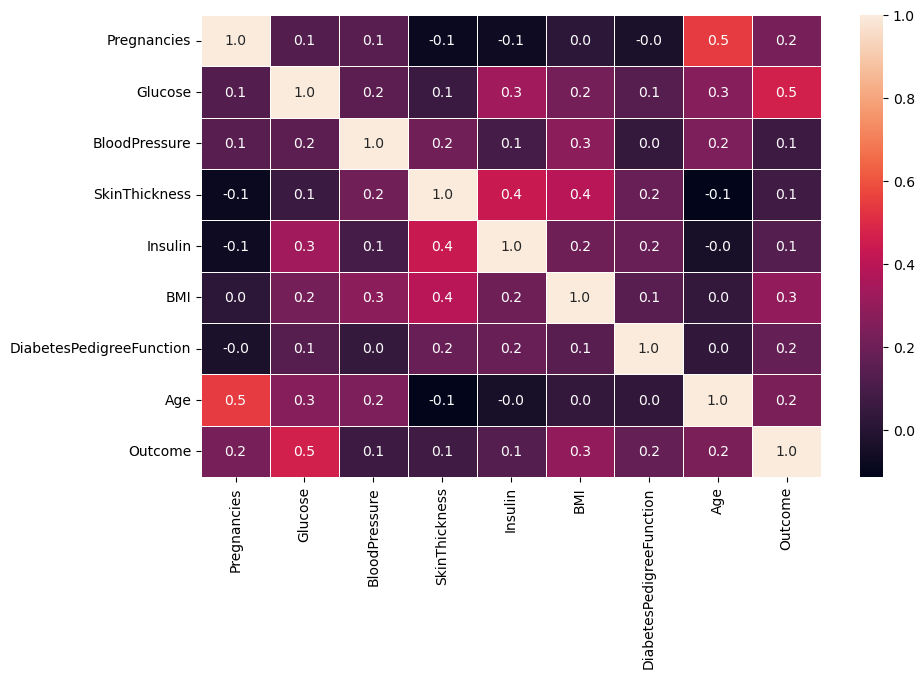

In [18]:
plt.figure(figsize=(10,6)) 
sns.heatmap(data.corr(),annot=True,fmt='0.1f',linewidth=0.5)  

In [19]:
data.corr()[["Pregnancies"	, "Glucose"]] 

,Pregnancies,Glucose
Pregnancies,1.000000,0.129459
Glucose,0.129459,1.000000
BloodPressure,0.141282,0.152590
SkinThickness,-0.081672,0.057328
Insulin,-0.073535,0.331357
BMI,0.017683,0.221071
DiabetesPedigreeFunction,-0.033523,0.137337
Age,0.544341,0.263514
Outcome,0.221898,0.466581


<AxesSubplot:>

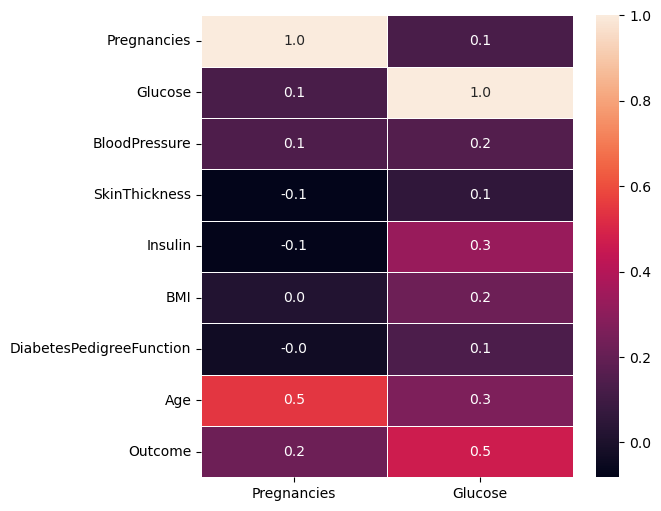

In [20]:
plt.figure(figsize=(6,6)) 
sns.heatmap(data.corr()[["Pregnancies"	, "Glucose"]] ,annot=True,fmt='0.1f',linewidth=0.5) 

In [21]:
data.Insulin.value_counts().head(10) 

0      374
105     11
130      9
140      9
120      8
94       7
180      7
100      7
135      6
115      6
Name: Insulin, dtype: int64

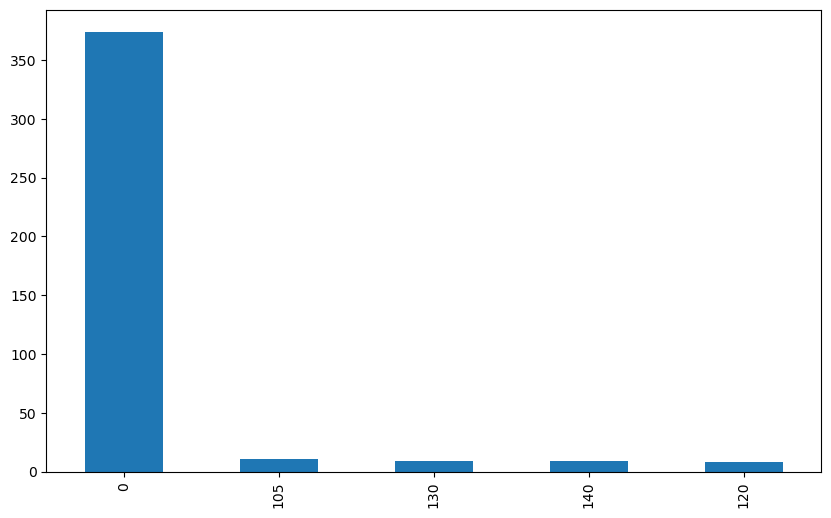

In [22]:
plt.figure(figsize=(10,6)) 
data.Insulin.value_counts().head().plot(kind = 'bar') 
plt.show()

In [23]:
data['Pregnancies'].value_counts() 

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

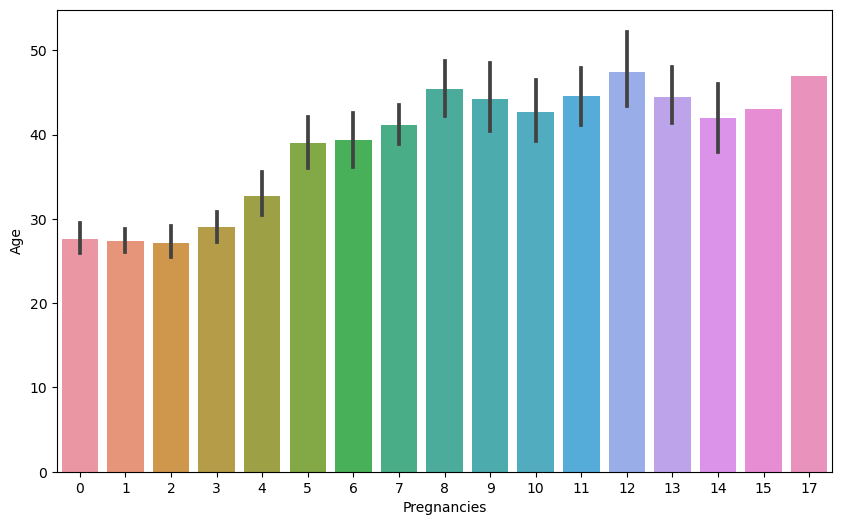

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data = data , x = "Pregnancies",  y = "Age" ) 

<AxesSubplot:title={'center':'counter plot'}, xlabel='Pregnancies', ylabel='count'>

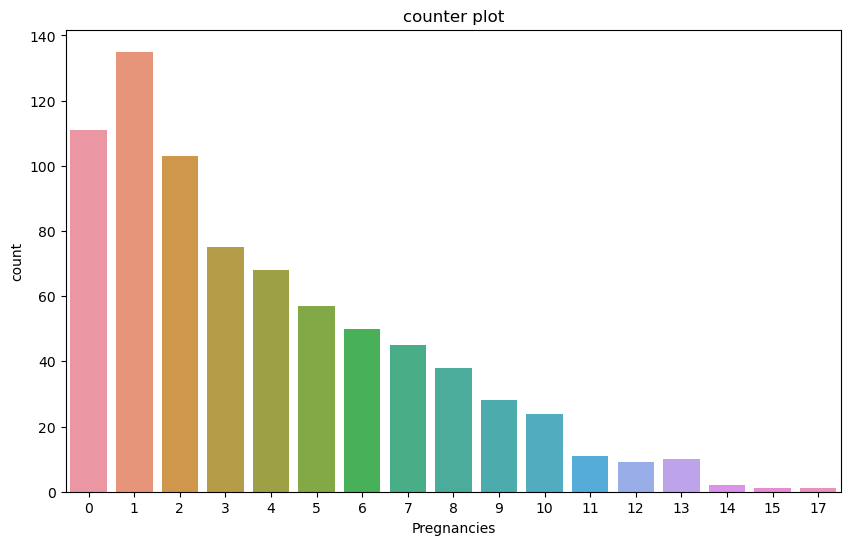

In [25]:
plt.figure(figsize=(10,6)) 
plt.title("counter plot") 
sns.countplot(x='Pregnancies',data=data) 

<Figure size 1000x600 with 0 Axes>

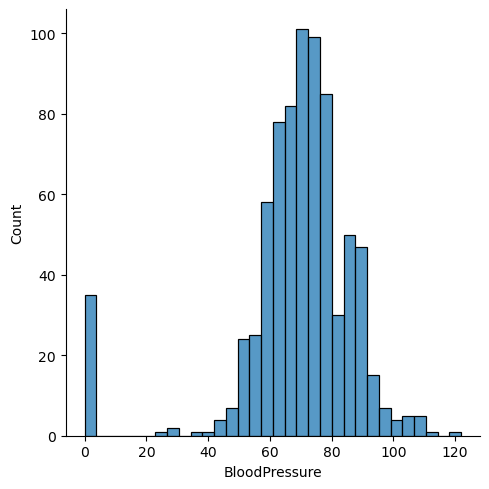

In [26]:
plt.figure(figsize=(10,6)) 
sns.displot(data["BloodPressure"])   
plt.show()

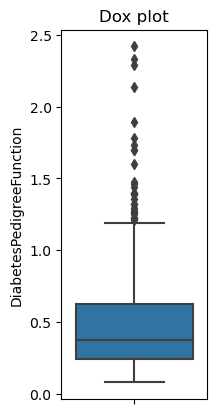

In [27]:
plt.subplot(1,3,3)
plt.title("Dox plot")
sns.boxplot(y=data["DiabetesPedigreeFunction"])  
plt.show()

<AxesSubplot:xlabel='Glucose'>

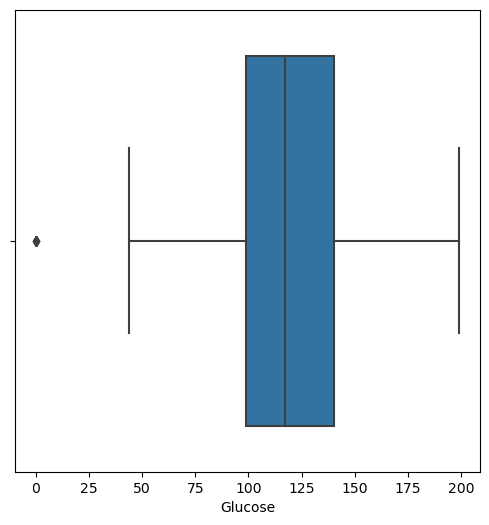

In [28]:
plt.figure(figsize=(6,6)) 
sns.boxplot(data.Glucose)   

<AxesSubplot:ylabel='Glucose'>

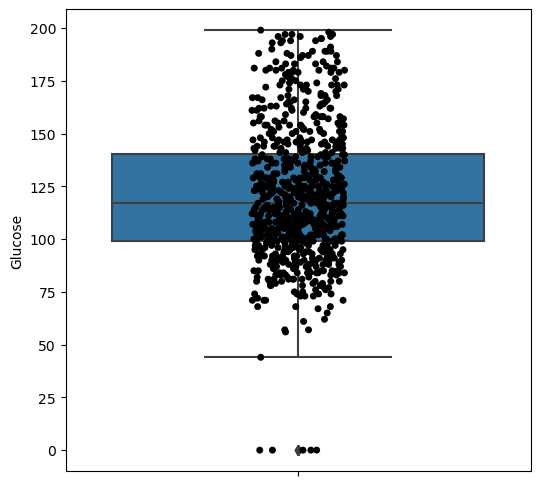

In [29]:
plt.figure(figsize=(6,6)) 
sns.boxplot(y='Glucose', data=data)
sns.stripplot(y='Glucose', data=data, color="k")

<AxesSubplot:ylabel='Insulin'>

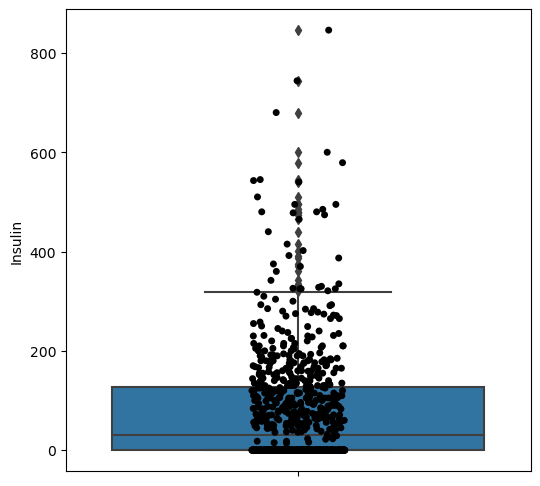

In [30]:
plt.figure(figsize=(6,6)) 
sns.boxplot(y='Insulin', data=data)
sns.stripplot(y='Insulin', data=data, color="k")

<AxesSubplot:ylabel='Pregnancies'>

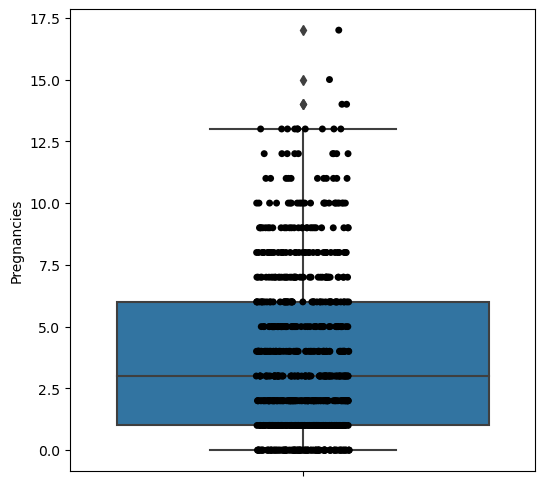

In [31]:
plt.figure(figsize=(6,6)) 
sns.boxplot(y='Pregnancies', data=data)
sns.stripplot(y='Pregnancies', data=data, color="k")

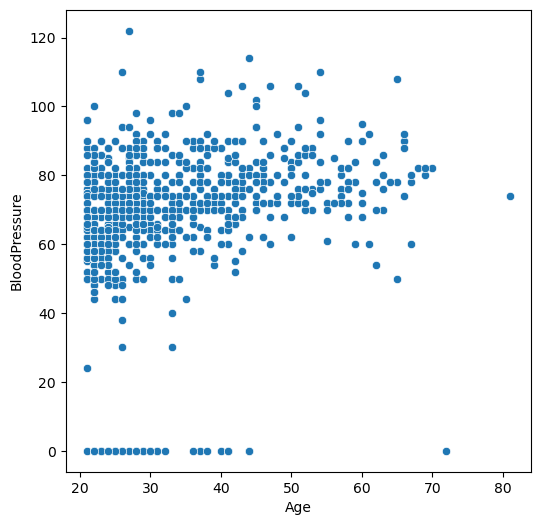

In [32]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(x='Age', y='BloodPressure', data=data)
plt.show() 

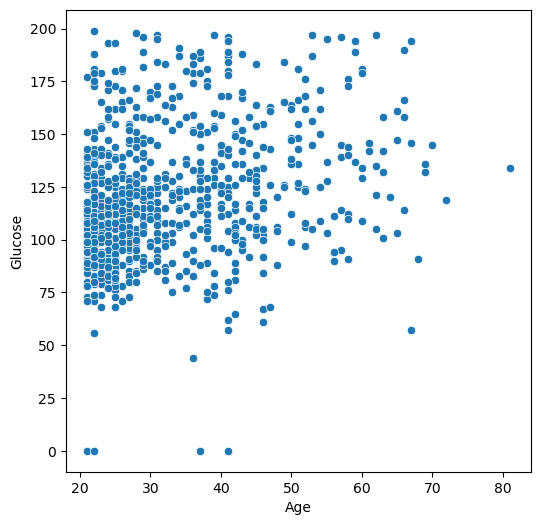

In [33]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(x='Age', y='Glucose', data=data)
plt.show() 

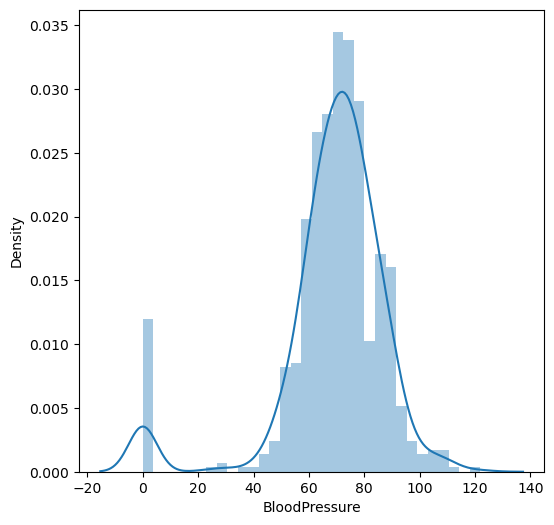

In [34]:
plt.figure(figsize=(6,6)) 
sns.distplot(data['BloodPressure'])  
plt.show()

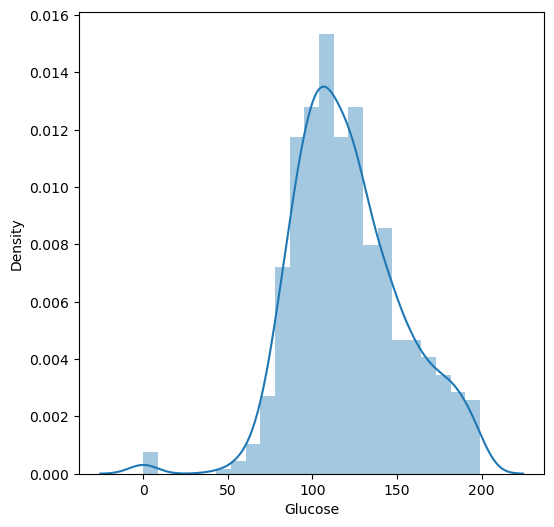

In [35]:
plt.figure(figsize=(6,6)) 
sns.distplot(data['Glucose'])  
plt.show()

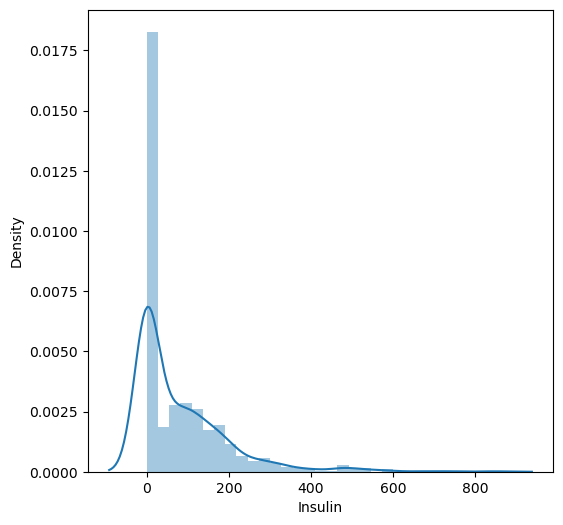

In [36]:
plt.figure(figsize=(6,6)) 
sns.distplot(data['Insulin'])  
plt.show()

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

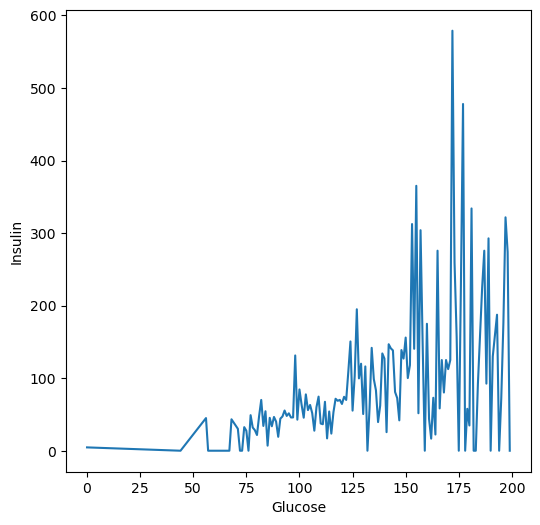

In [37]:
plt.figure(figsize=(6,6)) 
sns.lineplot(data=data , x= "Glucose" ,y= "Insulin", ci= None)

<AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>

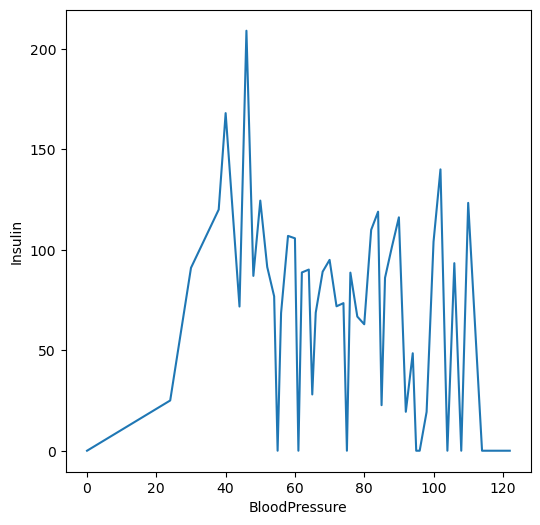

In [38]:
plt.figure(figsize=(6,6)) 
sns.lineplot(data=data , x= "BloodPressure" ,y= "Insulin", ci= None)

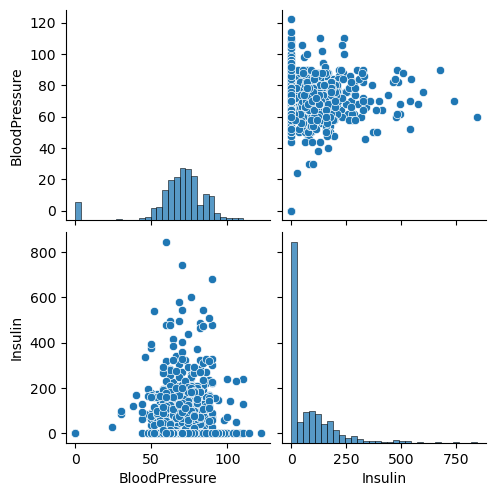

In [39]:
sns.pairplot(data, vars=["BloodPressure", "Insulin"])
plt.show()

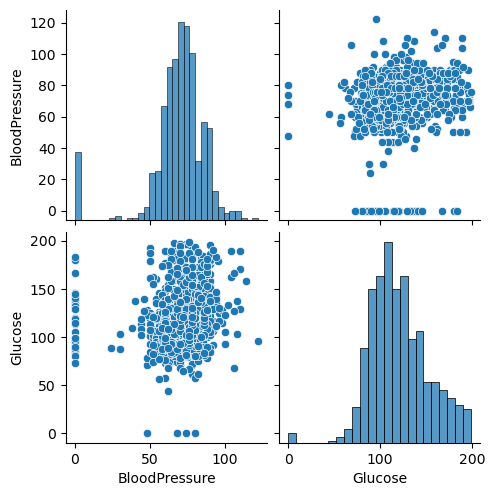

In [40]:
sns.pairplot(data, vars=["BloodPressure", "Glucose"])
plt.show()

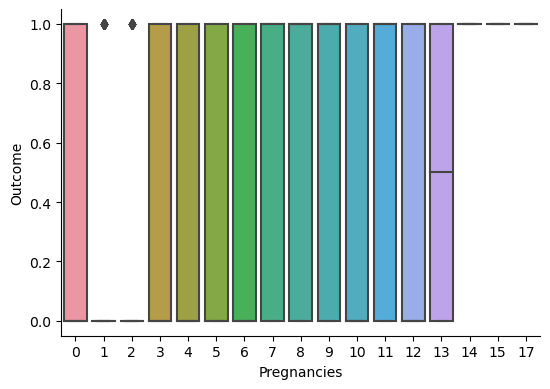

In [41]:
sns.catplot(y='Outcome', x='Pregnancies', data=data, kind='box', height=4, aspect=1.4)
plt.show()

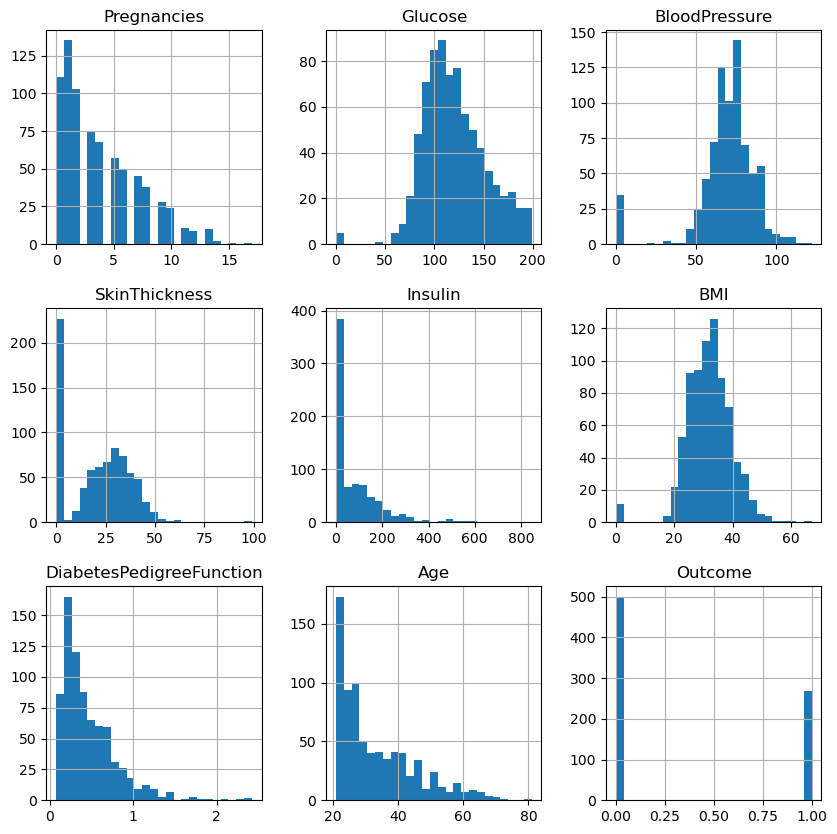

In [42]:
data.hist(bins=25, figsize=(10,10))
plt.show()

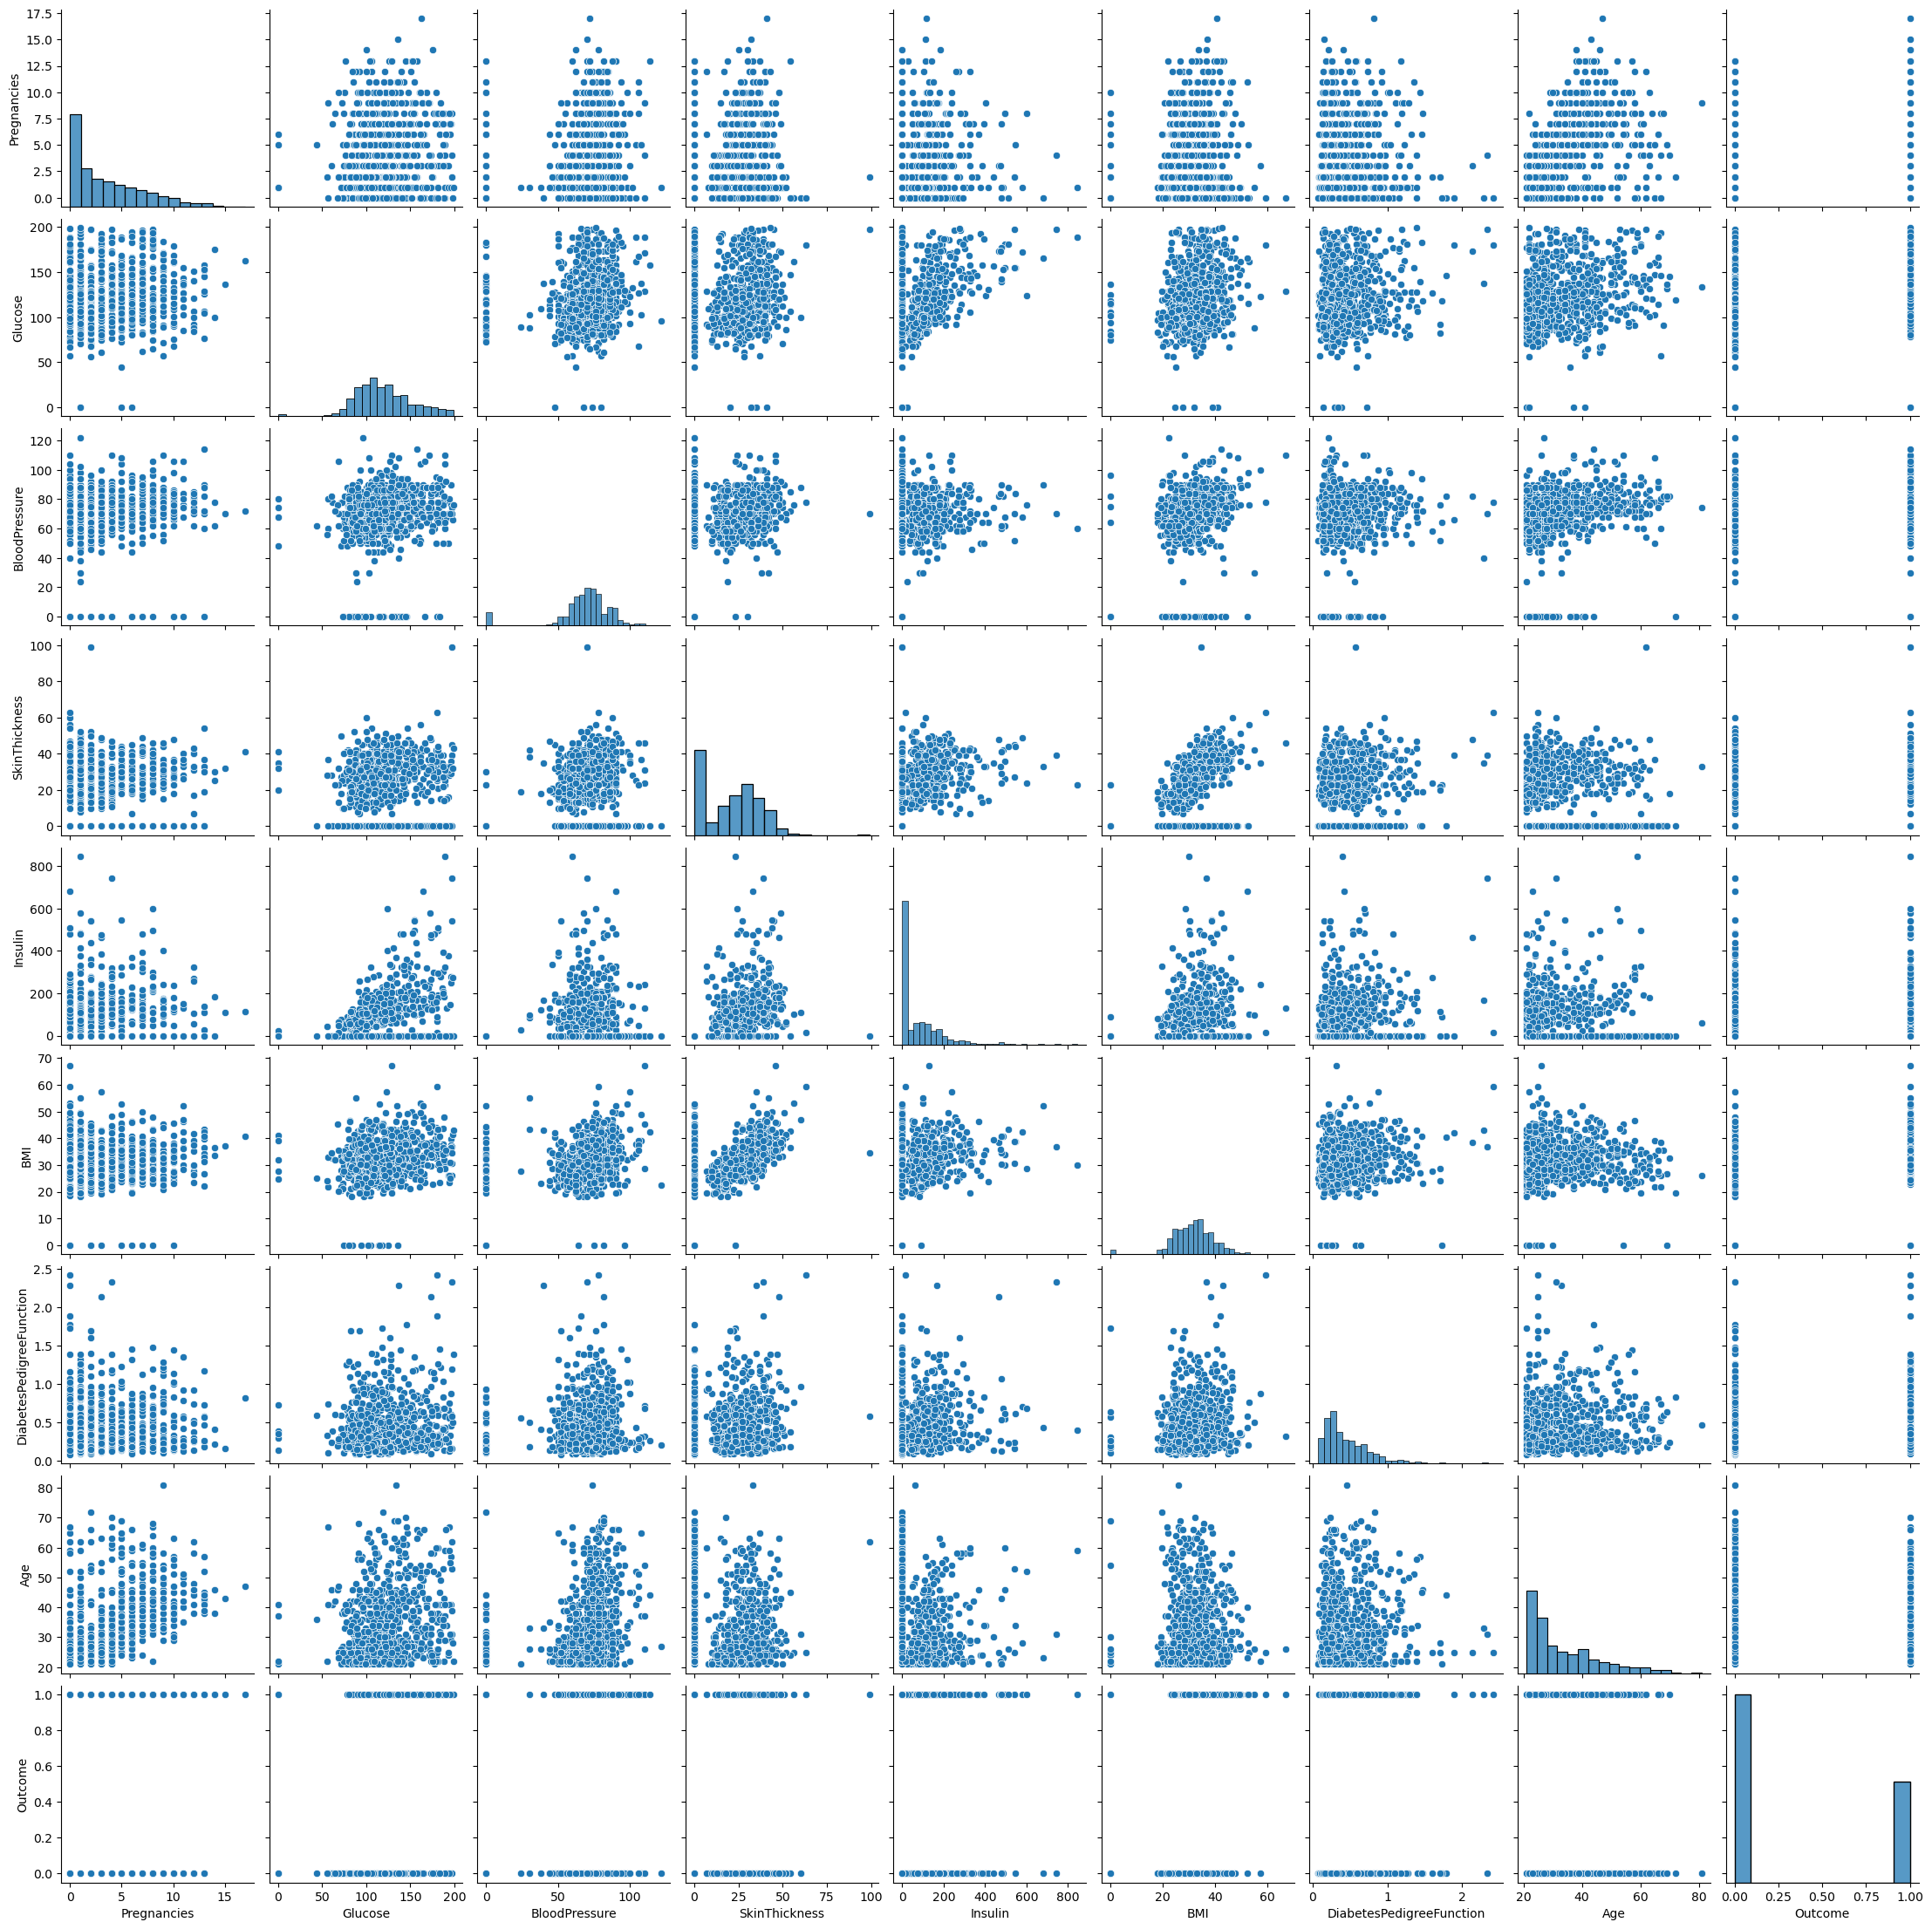

In [43]:
sns.pairplot(data)

# MODEL

In [44]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
from sklearn.model_selection import train_test_split  

In [46]:
X = data.drop('Outcome' ,axis=1)  
y = data['Outcome']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 )  

# LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression  

classifier1= LogisticRegression(random_state = 0 )  
classifier1.fit(X_train, y_train)     

LogisticRegression(random_state=0)

In [49]:
y_pred1=classifier1.predict(X_test)  

In [50]:
print(y_pred1) 

[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix  
a =accuracy_score(y_test, y_pred1)   
print(a)

0.7916666666666666


In [52]:
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[115  15]
 [ 25  37]]


<AxesSubplot:>

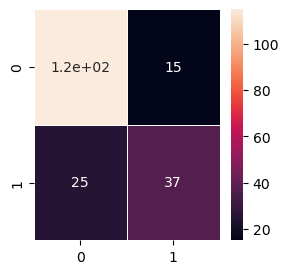

In [53]:
plt.figure(figsize=(3,3)) 
sns.heatmap(cm1,annot=True , linewidth=0.5) 

# Support Vector Machine (SVM)

In [54]:
from sklearn.svm import SVC

classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [55]:
y_pred2 = classifier2.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
b=accuracy_score(y_test, y_pred2) 
print(b)

0.8020833333333334


In [57]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[117  13]
 [ 25  37]]


<AxesSubplot:>

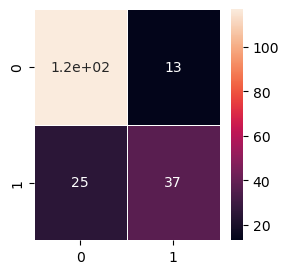

In [58]:
plt.figure(figsize=(3,3)) 
sns.heatmap(cm2,annot=True , linewidth=0.5) 

# K-Nearest Neighbors (K-NN)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

classifier3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier3.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred3 = classifier3.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
c=accuracy_score(y_test, y_pred3) 
print(c)

0.7552083333333334


In [62]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[109  21]
 [ 26  36]]


<AxesSubplot:>

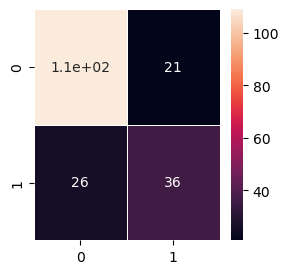

In [63]:
plt.figure(figsize=(3,3)) 
sns.heatmap(cm3,annot=True , linewidth=0.5) 

# Decision Tree Classification

In [64]:
from sklearn.tree import DecisionTreeClassifier

classifier4 = DecisionTreeClassifier( criterion = 'entropy', random_state = 0 ,max_depth=5)
classifier4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [65]:
y_pred4 = classifier4.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
d=accuracy_score(y_test, y_pred4) 
print(d)

0.7447916666666666


In [67]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[108  22]
 [ 27  35]]


<AxesSubplot:>

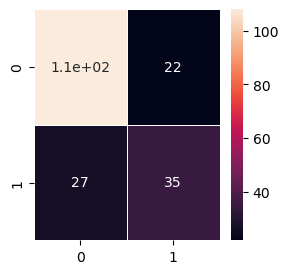

In [68]:
plt.figure(figsize=(3,3)) 
sns.heatmap(cm4,annot=True , linewidth=0.5) 

# Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)

GaussianNB()

In [70]:
y_pred5 = classifier5.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
e=accuracy_score(y_test, y_pred5) 
print(e)

0.765625


In [72]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[114  16]
 [ 29  33]]


<AxesSubplot:>

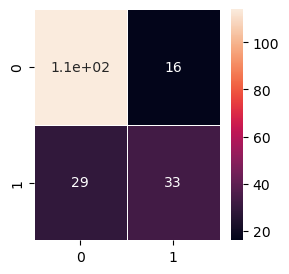

In [73]:
plt.figure(figsize=(3,3)) 
sns.heatmap(cm5,annot=True , linewidth=0.5) 

# Random Forest Classification

In [74]:
from sklearn.ensemble import RandomForestClassifier

classifier6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [75]:
y_pred6 = classifier6.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
f=accuracy_score(y_test, y_pred6) 
print(f)

0.7239583333333334


In [77]:
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)

[[110  20]
 [ 33  29]]


<AxesSubplot:>

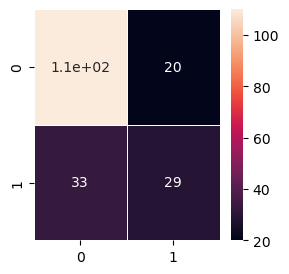

In [78]:
plt.figure(figsize=(3,3)) 
sns.heatmap(cm6,annot=True , linewidth=0.5) 

In [79]:
col=['LogisticRegression','Support Vector Machine','K-Nearest Neighbors','Decision Tree Classification','Naive Bayes','Random Forest Classification']
result=[a,b,c,d,e,f]

In [80]:
Final_result=pd.DataFrame({'Algorisms':col ,'Accuracies':result})
Final_result

,Algorisms,Accuracies
0,LogisticRegression,0.791667
1,Support Vector Machine,0.802083
2,K-Nearest Neighbors,0.755208
3,Decision Tree Classification,0.744792
4,Naive Bayes,0.765625
5,Random Forest Classification,0.723958


<AxesSubplot:>

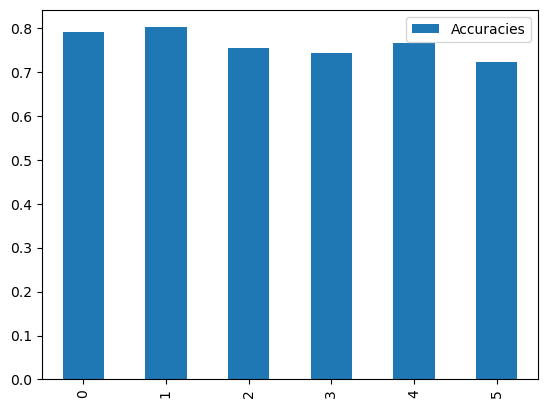

In [81]:
Final_result.plot(kind='bar')